<a href="https://colab.research.google.com/github/jpporfirio/Limpeza_Tratamento_de_Dados_Pandas/blob/main/limpeza_e_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo os dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/dataset-telecon.json'

In [ ]:
dados_churn = pd.read_json(url)
dados_churn.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [ ]:
dados_churn['conta'][0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [ ]:
pd.json_normalize(dados_churn['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [ ]:
pd.json_normalize(dados_churn['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


# Transformando dados em uma tabela

In [ ]:
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/dados/dataset-telecon.json') as f:
  json_bruto = json.load(f)

In [ ]:
json_bruto

In [ ]:
dados_normalizados = pd.json_normalize(json_bruto)

In [ ]:
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

***Cliente***


genero: gênero (masculino e feminino)
idoso: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos

parceiro: se o(a) cliente possui ou não um(a) parceiro ou parceira

dependentes: se o(a) cliente possui ou não dependentes

tempo_servico: meses de contrato do(a) cliente


***Serviço de telefonia***


servico_telefone: assinatura de serviço telefônico
varias_linhas: assinatura de mais de uma linha de telefone


***Serviço de internet***


servico_internet: assinatura de um provedor internet

seguranca_online: assinatura adicional de segurança online

backup_online: assinatura adicional de backup online

protecao_dispositivo: assinatura adicional de proteção no dispositivo

suporte_tecnico: assinatura adicional de suporte técnico, menos tempo de espera

tv_streaming: assinatura de TV a cabo

filmes_streaming: assinatura de streaming de filmes


***Conta***


contrato: tipo de contrato

faturamente_eletronico: se o(a) cliente prefere receber a fatura online
metodo_pagamento: forma de pagamento

cobranca.mensal: total de todos os serviços do(a) cliente por mês

cobranca.Total: total gasto pelo(a) cliente

# Tratando Dados

In [ ]:
'''dados_normalizados['conta.cobranca.Total'].astype(float) '''

"dados_normalizados['conta.cobranca.Total'].astype(float) "

In [ ]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,


In [ ]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico','conta.contrato','conta.cobranca.mensal','conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [ ]:
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index

In [ ]:
idx

Int64Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [ ]:
dados_normalizados.loc[idx, ['conta.cobranca.Total']] = dados_normalizados.loc[idx, 'conta.cobranca.mensal'] * 24

In [ ]:
dados_normalizados.loc[idx, ['cliente.tempo_servico']] = 24

In [ ]:
dados_normalizados.loc[idx, ['cliente.tempo_servico','conta.contrato','conta.cobranca.mensal','conta.cobranca.Total']]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [ ]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [ ]:
for col in dados_normalizados.columns:
  print(f'Coluna: {col}')
  print(dados_normalizados[col].unique())
  print('-' * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [ ]:
dados_normalizados[dados_normalizados['Churn'] == ''].head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45


In [ ]:
dados_normalizados.query('not "" == Churn')

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [ ]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ""].copy()

In [ ]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   o

In [ ]:
dados_sem_vazio.reset_index(drop = True, inplace = True)

In [ ]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   o

# Dados duplicados e nulos

In [ ]:
dados_sem_vazio.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [ ]:
'''f = lambda x: True if x == False else False
d = list(dados_sem_vazio.duplicated())
n_d = []
for i in d:
  n = f(i)
  n_d.append(n)

tt = dados_sem_vazio[n_d]'''

'f = lambda x: True if x == False else False\nd = list(dados_sem_vazio.duplicated())\nn_d = []\nfor i in d:\n  n = f(i)\n  n_d.append(n)\n\ntt = dados_sem_vazio[n_d]'

In [ ]:
#valores_duplicados = list(dados_sem_vazio[filtro_duplicadas].index)
#dados_sem_duplicadas = dados_sem_vazio.drop(valores_duplicados).copy()

In [ ]:
dados_sem_vazio.duplicated().sum()

75

In [ ]:
filtro_duplicadas = dados_sem_vazio.duplicated()

In [ ]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [ ]:
dados_sem_vazio.drop_duplicates(inplace = True)

In [ ]:
dados_sem_vazio.duplicated().sum()

0

# Identificando e removendo dados nulos

In [ ]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [ ]:
dados_sem_vazio.isna().sum().sum()

114

In [ ]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis = 1)].head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25


In [ ]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

In [ ]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [ ]:
import numpy as np

In [ ]:
np.ceil(dados_sem_vazio[filtro]['conta.cobranca.Total'] / dados_sem_vazio[filtro]['conta.cobranca.mensal'])

9       66.0
176     13.0
181      5.0
751     60.0
3523    14.0
5273     6.0
5276    49.0
6134    29.0
dtype: float64

In [ ]:
dados_sem_vazio['cliente.tempo_servico'].fillna(np.ceil(
    dados_sem_vazio[filtro]['conta.cobranca.Total'] / dados_sem_vazio[filtro]['conta.cobranca.mensal']
),inplace = True)

In [ ]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [ ]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [ ]:
dados_sem_vazio['conta.contrato'].value_counts()

mes a mes    3861
dois anos    1688
um ano       1463
Name: conta.contrato, dtype: int64

In [ ]:
colunas_dropar = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento']

In [ ]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis = 1)][colunas_dropar]

,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento
0,None,None,None
437,None,None,cartao de credito (automatico)
963,None,sim,None
1604,None,nao,None
1605,None,nao,None
1606,None,sim,cartao de credito (automatico)
1608,mes a mes,None,cheque pelo correio
2036,mes a mes,sim,None
2037,None,None,None
2039,None,None,cheque pelo correio


In [ ]:
df_sem_nulos = dados_sem_vazio.dropna(subset = colunas_dropar).copy()
df_sem_nulos.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [ ]:
df_sem_nulos.reset_index(drop = True, inplace = True)

In [ ]:
df_sem_nulos.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

# Exercicios

In [ ]:
desafio_1 = {
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}

In [ ]:
pd.json_normalize(desafio_1, record_path = 'enderecos', meta = ['nome', 'idade'])

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


In [ ]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/dados/exercicio2.json') as f:
  json_exercicio_2 = json.load(f)

In [ ]:
json_exercicio_2

{'pessoas': [{'nome': 'João',
   'idade': '25',
   'endereco': {'rua': 'Rua A', 'numero': 123, 'cidade': 'São Paulo'},
   'telefones': ['11 1111-1111', '11 2222-2222']},
  {'nome': 'Maria',
   'idade': 30,
   'endereco': {'rua': '', 'numero': 456, 'cidade': 'Rio de Janeiro'},
   'telefones': ['21 3333-3333']}]}

In [ ]:
exercicio_2 = pd.json_normalize(data = json_exercicio_2, record_path = 'pessoas').explode('telefones')

In [ ]:
exercicio_2

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,11 1111-1111,Rua A,123,São Paulo
0,João,25,11 2222-2222,Rua A,123,São Paulo
1,Maria,30,21 3333-3333,,456,Rio de Janeiro


In [ ]:
exercicio_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             3 non-null      object
 1   idade            3 non-null      object
 2   telefones        3 non-null      object
 3   endereco.rua     3 non-null      object
 4   endereco.numero  3 non-null      int64 
 5   endereco.cidade  3 non-null      object
dtypes: int64(1), object(5)
memory usage: 168.0+ bytes


In [ ]:
for col in exercicio_2.columns:
  print(f'coluna: {col}')
  print(exercicio_2[col].unique)
  print('*' * 30)

coluna: nome
<bound method Series.unique of 0     João
0     João
1    Maria
Name: nome, dtype: object>
******************************
coluna: idade
<bound method Series.unique of 0    25
0    25
1    30
Name: idade, dtype: object>
******************************
coluna: telefones
<bound method Series.unique of 0    11 1111-1111
0    11 2222-2222
1    21 3333-3333
Name: telefones, dtype: object>
******************************
coluna: endereco.rua
<bound method Series.unique of 0    Rua A
0    Rua A
1         
Name: endereco.rua, dtype: object>
******************************
coluna: endereco.numero
<bound method Series.unique of 0    123
0    123
1    456
Name: endereco.numero, dtype: int64>
******************************
coluna: endereco.cidade
<bound method Series.unique of 0         São Paulo
0         São Paulo
1    Rio de Janeiro
Name: endereco.cidade, dtype: object>
******************************


In [ ]:
#ex2_sem_vazio =
exercicio_2[exercicio_2['endereco.rua'] == '']

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
1,Maria,30,21 3333-3333,,456,Rio de Janeiro


In [ ]:
ex2_sem_vazio = exercicio_2.query('"" != `endereco.rua`').copy()

In [ ]:
ex2_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 112.0+ bytes


In [ ]:
ex2_sem_vazio['idade'] = ex2_sem_vazio['idade'].astype(int)

In [ ]:
ex2_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 112.0+ bytes


In [ ]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/dados/cursos_cadastrados.json') as f:
  ex3_json = json.load(f)

In [ ]:
ex3_json

[{'curso': 'Introdução à programação',
  'categoria': 'Programação',
  'carga_horaria': '20 horas',
  'concluintes': 100,
  'data_inicio': '2022-01-01',
  'data_conclusao': '2022-01-20',
  'descricao': 'Curso introdutório à programação com Python',
  'preco': '99.90',
  'instrutor': {'nome': 'João Silva',
   'email': 'joao.silva@emailaleatorio.com',
   'telefone': '(11) 9999-9999'}},
 {'curso': 'Excel para iniciantes',
  'categoria': 'Produtividade',
  'carga_horaria': None,
  'concluintes': None,
  'data_inicio': None,
  'data_conclusao': None,
  'descricao': None,
  'preco': None,
  'instrutor': {'nome': 'Maria Oliveira',
   'email': 'maria.oliveira@emailaleatorio.com',
   'telefone': '(11) 8888-8888'}},
 {'curso': 'Marketing digital para negócios',
  'categoria': 'Marketing',
  'carga_horaria': '30 horas',
  'concluintes': 75,
  'data_inicio': '2022-03-01',
  'data_conclusao': '2022-03-31',
  'descricao': 'Curso introdutório em marketing',
  'preco': 89.9,
  'instrutor': {'nome': 'A

In [ ]:
ex_3 = pd.json_normalize(ex3_json)
ex_3

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [ ]:
ex_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               6 non-null      object
 1   categoria           6 non-null      object
 2   carga_horaria       5 non-null      object
 3   concluintes         5 non-null      object
 4   data_inicio         5 non-null      object
 5   data_conclusao      5 non-null      object
 6   descricao           5 non-null      object
 7   preco               5 non-null      object
 8   instrutor.nome      6 non-null      object
 9   instrutor.email     6 non-null      object
 10  instrutor.telefone  6 non-null      object
dtypes: object(11)
memory usage: 656.0+ bytes


In [ ]:
ex_3.isna().sum()

curso                 0
categoria             0
carga_horaria         1
concluintes           1
data_inicio           1
data_conclusao        1
descricao             1
preco                 1
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [ ]:
retirar = list(ex_3[ex_3.isna().any(axis = 1)].index)

In [ ]:
ex_3.drop(retirar, axis = 0, inplace = True)

In [ ]:
ex_3.isna().sum()

curso                 0
categoria             0
carga_horaria         0
concluintes           0
data_inicio           0
data_conclusao        0
descricao             0
preco                 0
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [ ]:
ex_3.drop_duplicates(inplace = True)

In [ ]:
ex_3.duplicated()

0    False
2    False
3    False
4    False
dtype: bool

In [ ]:
ex_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 4
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               4 non-null      object
 1   categoria           4 non-null      object
 2   carga_horaria       4 non-null      object
 3   concluintes         4 non-null      object
 4   data_inicio         4 non-null      object
 5   data_conclusao      4 non-null      object
 6   descricao           4 non-null      object
 7   preco               4 non-null      object
 8   instrutor.nome      4 non-null      object
 9   instrutor.email     4 non-null      object
 10  instrutor.telefone  4 non-null      object
dtypes: object(11)
memory usage: 384.0+ bytes


In [ ]:
for col in ex_3.columns:
  print(f'Coluna: {col}')
  print(ex_3[col].unique())

Coluna: curso
['Introdução à programação' 'Marketing digital para negócios'
 'Inteligência artificial' 'Inglês para negócios']
Coluna: categoria
['Programação' 'Marketing' 'Idiomas']
Coluna: carga_horaria
['20 horas' '30 horas' '40 horas']
Coluna: concluintes
[100 75 '' 30]
Coluna: data_inicio
['2022-01-01' '2022-03-01' '2022-04-01' '']
Coluna: data_conclusao
['2022-01-20' '2022-03-31' '']
Coluna: descricao
['Curso introdutório à programação com Python'
 'Curso introdutório em marketing'
 'Curso avançado sobre inteligência artificial com Python'
 'Curso de inglês para negócios']
Coluna: preco
['99.90' 89.9 129.9 69.9]
Coluna: instrutor.nome
['João Silva' 'Ana Santos' '' 'John Smith']
Coluna: instrutor.email
['joao.silva@emailaleatorio.com' 'ana.santos@emailaleatorio.com'
 'contato@emailaleatorio.com' '']
Coluna: instrutor.telefone
['(11) 9999-9999' '(11) 7777-7777' '']


In [ ]:
ex_3.columns

Index(['curso', 'categoria', 'carga_horaria', 'concluintes', 'data_inicio',
       'data_conclusao', 'descricao', 'preco', 'instrutor.nome',
       'instrutor.email', 'instrutor.telefone'],
      dtype='object')

In [ ]:
ex_3['concluintes'].unique()

array([100, 75, '', 30], dtype=object)

In [ ]:
idx_ex3 = list(ex_3[ex_3['concluintes'] == ''].index)
idx_ex3

[3]

In [ ]:
ex_3.loc[idx_ex3, 'concluintes'] = ex_3.loc[idx_ex3, 'concluintes'] = 0

In [ ]:
ex_3['concluintes'].unique()

array([100, 75, 0, 30], dtype=object)

In [ ]:
ex_3['concluintes'] = ex_3['concluintes'].astype(int)

In [ ]:
ex_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 4
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               4 non-null      object
 1   categoria           4 non-null      object
 2   carga_horaria       4 non-null      object
 3   concluintes         4 non-null      int64 
 4   data_inicio         4 non-null      object
 5   data_conclusao      4 non-null      object
 6   descricao           4 non-null      object
 7   preco               4 non-null      object
 8   instrutor.nome      4 non-null      object
 9   instrutor.email     4 non-null      object
 10  instrutor.telefone  4 non-null      object
dtypes: int64(1), object(10)
memory usage: 556.0+ bytes


In [ ]:
ex_3.replace('', pd.NA, inplace = True)

In [ ]:
ex_3.dropna(inplace = True)

In [ ]:
ex_3

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [ ]:
ex_3['data_inicio'] = pd.to_datetime(ex_3['data_inicio'])

In [ ]:
ex_3['data_conclusao'] = pd.to_datetime(ex_3['data_conclusao'])

In [ ]:
ex_3['preco'] = ex_3['preco'].astype(float)

In [ ]:
ex_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 192.0+ bytes


# OUTLIERS

In [ ]:
df_sem_nulo = df_sem_nulos
df_sem_nulo.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [ ]:
df_sem_nulos.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='cliente.tempo_servico'>

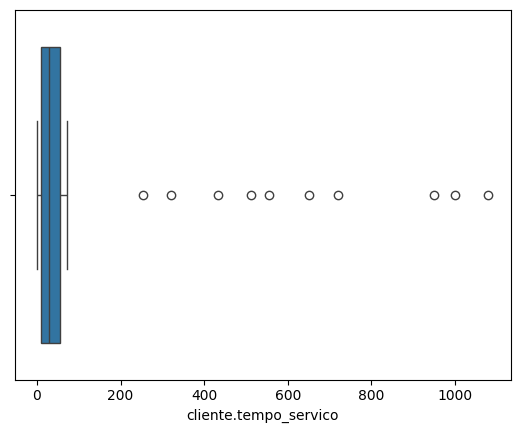

In [ ]:
sns.boxplot(x = df_sem_nulo['cliente.tempo_servico'])

In [ ]:
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q1

9.0

In [ ]:
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(.75)
Q3

56.0

In [ ]:
IIQ = Q3 - Q1
IIQ

47.0

In [ ]:
limite_inferior = Q1 - 1.5 * IIQ

In [ ]:
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
df_sem_nulo[df_sem_nulo['cliente.tempo_servico'] >= limite_superior]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.90,112212.00
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.90,45900.00
1952,2834-SPCJV,sim,masculino,0,sim,nao,950.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.10,79895.00
1956,2842-JTCCU,sim,masculino,0,nao,nao,254.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,transferencia bancaria (automatica),46.05,80.35
1958,2845-AFFTX,sim,masculino,1,sim,nao,321.0,sim,sim,fibra otica,...,nao,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,99.80,4259.30
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.00,47450.00
1966,2856-NNASM,sim,masculino,1,nao,nao,721.0,sim,nao,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cheque pelo correio,89.55,3856.75
1970,2862-JVEOY,nao,masculino,0,nao,nao,555.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,19.15,124.40
1973,2865-TCHJW,sim,feminino,1,nao,nao,433.0,sim,sim,fibra otica,...,nao,sim,nao,sim,nao,mes a mes,sim,cheque eletronico,89.20,346.20
1974,2866-IKBTM,nao,feminino,0,nao,nao,512.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,19.55,19.55


In [ ]:
df_sem_nulo.loc[(df_sem_nulo['cliente.tempo_servico'] >= limite_superior) | (df_sem_nulo['cliente.tempo_servico'] <= limite_inferior)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.90,112212.00
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.90,45900.00
1952,2834-SPCJV,sim,masculino,0,sim,nao,950.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.10,79895.00
1956,2842-JTCCU,sim,masculino,0,nao,nao,254.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,transferencia bancaria (automatica),46.05,80.35
1958,2845-AFFTX,sim,masculino,1,sim,nao,321.0,sim,sim,fibra otica,...,nao,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,99.80,4259.30
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.00,47450.00
1966,2856-NNASM,sim,masculino,1,nao,nao,721.0,sim,nao,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cheque pelo correio,89.55,3856.75
1970,2862-JVEOY,nao,masculino,0,nao,nao,555.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,19.15,124.40
1973,2865-TCHJW,sim,feminino,1,nao,nao,433.0,sim,sim,fibra otica,...,nao,sim,nao,sim,nao,mes a mes,sim,cheque eletronico,89.20,346.20
1974,2866-IKBTM,nao,feminino,0,nao,nao,512.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,19.55,19.55


In [ ]:
outliers = (df_sem_nulo['cliente.tempo_servico'] >= limite_superior) | (df_sem_nulo['cliente.tempo_servico'] <= limite_inferior)
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
7001    False
7002    False
7003    False
7004    False
7005    False
Name: cliente.tempo_servico, Length: 7006, dtype: bool

In [ ]:
df_sem_nulo[outliers][['cliente.tempo_servico' ,'conta.cobranca.mensal',	'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,950.0,84.10,79895.00
1956,254.0,46.05,80.35
1958,321.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,721.0,89.55,3856.75
1970,555.0,19.15,124.40
1973,433.0,89.20,346.20
1974,512.0,19.55,19.55


In [ ]:
df_sem_out = df_sem_nulo.copy()
df_sem_out[outliers]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

In [ ]:
df_sem_out.loc[outliers, 'cliente.tempo_servico'] = \
np.ceil(df_sem_out.loc[outliers, 'conta.cobranca.Total'] / df_sem_out.loc[outliers, 'conta.cobranca.mensal'])
df_sem_out.loc[outliers, 'cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     951.0
1956       2.0
1958      43.0
1963     650.0
1966      44.0
1970       7.0
1973       4.0
1974       1.0
Name: cliente.tempo_servico, dtype: float64

<Axes: xlabel='cliente.tempo_servico'>

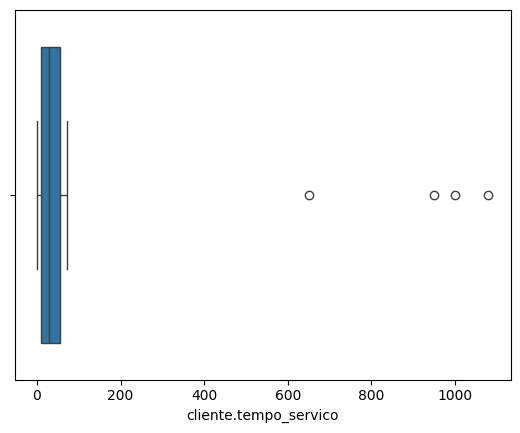

In [ ]:
sns.boxplot(x = df_sem_out['cliente.tempo_servico'])

In [ ]:
df_sem_out[outliers][['cliente.tempo_servico' ,'conta.cobranca.mensal',	'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


In [ ]:
df_sem_out[(df_sem_out['cliente.tempo_servico'] >= limite_superior) | (df_sem_out['cliente.tempo_servico'] <= limite_inferior)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1952,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


In [ ]:
excluir_out = df_sem_out[(df_sem_out['cliente.tempo_servico'] >= limite_superior) | (df_sem_out['cliente.tempo_servico'] <= limite_inferior)].index
excluir_out

Int64Index([1945, 1946, 1952, 1963], dtype='int64')

In [ ]:
df_sem_out.drop(excluir_out, axis = 0, inplace = True)

KeyError: '[1945, 1946, 1952, 1963] not found in axis'

<Axes: ylabel='cliente.tempo_servico'>

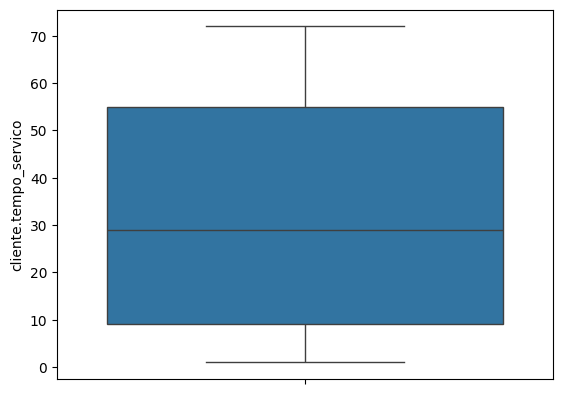

In [ ]:
sns.boxplot(df_sem_out['cliente.tempo_servico'])

In [ ]:
df_sem_out[(df_sem_out['cliente.tempo_servico'] >= limite_superior) | (df_sem_out['cliente.tempo_servico'] <= limite_inferior)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total


In [ ]:
df_sem_id = df_sem_out.drop('id_cliente', axis = 1).copy()
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [ ]:
mapeamento = {
    'sim': 1,
    'nao': 0,
    'maculino': 0,
    'feminino': 1
}

In [ ]:
for col in df_sem_id.columns:
  print(f'Coluna: {col}')
  print(df_sem_id[col].unique())

Coluna: id_cliente
['0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna: Churn
['nao' 'sim']
Coluna: cliente.idoso
[0 1]
Coluna: cliente.parceiro
['nao' 'sim']
Coluna: cliente.dependentes
['nao' 'sim']
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
Coluna: telefone.servico_telefone
['sim' 'nao']
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
Coluna: internet.backup_online
['nao' 'sim' 'sem servico de internet']
Coluna: internet.protecao_dispositivo
['nao' 'sim' 'sem servico de internet']
Coluna: internet.suporte_tecnico

In [ ]:
colunas = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

In [ ]:
df_sem_id[colunas]

,telefone.servico_telefone,Churn,cliente.parceiro,cliente.dependentes,conta.faturamente_eletronico
0,sim,nao,nao,nao,nao
1,sim,sim,nao,nao,sim
2,sim,sim,sim,nao,sim
3,sim,sim,sim,nao,sim
4,sim,nao,nao,sim,sim
...,...,...,...,...,...
7001,sim,nao,nao,nao,nao
7002,sim,sim,sim,nao,sim
7003,sim,nao,nao,nao,sim
7004,sim,nao,sim,sim,nao


In [ ]:
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento).astype(int)
df_sem_id

,id_cliente,Churn,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,1,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,0011-IGKFF,1,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0013-MHZWF,0,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,0,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,1,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [ ]:
for col in df_sem_id.columns:
  print(f'Coluna: {col}')
  print(df_sem_id[col].unique())

Coluna: id_cliente
['0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Coluna: Churn
[0 1]
Coluna: cliente.idoso
[0 1]
Coluna: cliente.parceiro
[0 1]
Coluna: cliente.dependentes
[0 1]
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
Coluna: telefone.servico_telefone
[1 0]
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
Coluna: internet.backup_online
['nao' 'sim' 'sem servico de internet']
Coluna: internet.protecao_dispositivo
['nao' 'sim' 'sem servico de internet']
Coluna: internet.suporte_tecnico
['nao' 'sim' 'sem servico de in

In [ ]:
df_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7002 entries, 0 to 7005
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7002 non-null   object 
 1   cliente.genero                 7002 non-null   object 
 2   cliente.idoso                  7002 non-null   int64  
 3   cliente.parceiro               7002 non-null   object 
 4   cliente.dependentes            7002 non-null   object 
 5   cliente.tempo_servico          7002 non-null   float64
 6   telefone.servico_telefone      7002 non-null   object 
 7   telefone.varias_linhas         7002 non-null   object 
 8   internet.servico_internet      7002 non-null   object 
 9   internet.seguranca_online      7002 non-null   object 
 10  internet.backup_online         7002 non-null   object 
 11  internet.protecao_dispositivo  7002 non-null   object 
 12  internet.suporte_tecnico       7002 non-null   o

In [ ]:
pd.get_dummies(df_sem_id)

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total,Churn_nao,Churn_sim,cliente.genero_feminino,cliente.genero_masculino,cliente.parceiro_nao,cliente.parceiro_sim,...,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.faturamente_eletronico_nao,conta.faturamente_eletronico_sim,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,9.0,59.90,542.40,1,0,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
1,0,4.0,73.90,280.85,0,1,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
2,1,13.0,98.00,1237.85,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
3,1,3.0,83.90,267.40,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,0,9.0,69.40,571.45,1,0,1,0,1,0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,0,13.0,55.15,742.90,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
7002,0,22.0,85.10,1873.70,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7003,0,2.0,50.30,92.75,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
7004,0,67.0,67.85,4627.65,1,0,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0


In [ ]:
df_sem_id.columns

Index(['Churn', 'cliente.genero', 'cliente.idoso', 'cliente.parceiro',
       'cliente.dependentes', 'cliente.tempo_servico',
       'telefone.servico_telefone', 'telefone.varias_linhas',
       'internet.servico_internet', 'internet.seguranca_online',
       'internet.backup_online', 'internet.protecao_dispositivo',
       'internet.suporte_tecnico', 'internet.tv_streaming',
       'internet.filmes_streaming', 'conta.contrato',
       'conta.faturamente_eletronico', 'conta.metodo_pagamento',
       'conta.cobranca.mensal', 'conta.cobranca.Total'],
      dtype='object')